# Introduction

NBA is one of the four majors sports competitions in America. It is very competitive, and all teams want to attract the best players. Imagine that your team is trying to hire a new player; how much should you offer to get the best deal? 

That project aims to help you answer this question. More precisely, we will build machine learning models to predict a player's salary. As expected, a player's salary depends on many factors such as his positions, his performance, the home team, and many more. 


To answer this question, we will use the following dataset to train and test our models. 

About the dataset: 

It is downloaded from this <a href="http://web.grinnell.edu/individuals/kuipers/stat2labs/NBA.html
"> website</a>


This file contains an intensive list of variables. Here are some that we find interesting (please see the file a complete list of all variables. Alternatively, you can see them on <a href= " https://en.wikipedia.org/wiki/Basketball_statistics"> Wikipedia </a> as well). We list here some of these variables. 

3P:	Average number of shots made from beyond the 3-point line.

FT:	Average number of Free Throws made per game.

AST: Average number of Assists per game.

PF	Average number of Personal Fouls per game.






# Part 1: An overview of the dataset.

In this part, we will make a quick glimpse at the data. First, we import several relevant packages.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.stats.api as sms
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from IPython.core.pylabtools import figsize


Next, we open the excel file containing the relevant data.

In [159]:
df=pd.read_excel("NBA Salary Data.xlsx")
df.head()

,Year,Player,Position,Team,Salary,Length of Contract,Age,G,GS,MP,...,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/48
0,2012-2013,Blake Griffin,Forward,Los Angeles Clippers,18668431,5,23,80,80,32.5,...,2.0,1.6,12.8,25.4,114,102,6.8,3.9,10.6,0.196
1,2012-2013,Chris Paul,Guard,Los Angeles Clippers,16441500,5,27,70,70,33.4,...,3.8,0.4,13.7,22.6,127,102,10.6,3.4,13.9,0.287
2,2012-2013,JJ Redick,Guard,Los Angeles Clippers,10079404,4,28,78,13,30.5,...,0.8,0.3,12.5,20.8,111,113,4.0,0.5,4.5,0.091
3,2010-2011,DeAndre Jordan,Center,Los Angeles Clippers,6500000,4,22,80,66,25.6,...,1.0,5.4,18.8,11.7,116,105,2.6,2.6,5.2,0.122
4,2011-2012,Jamal Crawford,Guard,Los Angeles Clippers,5000000,4,31,60,6,26.9,...,1.8,0.7,11.8,26.6,102,109,1.6,0.7,2.3,0.069


Let us have an overivew of the dataset. 

In [5]:
df.describe()

,Salary,Length of Contract,Age,G,GS,MP,FG,FGA,FG%,3P,...,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/48
count,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,5.856375e+06,3.148148,26.814815,61.583333,33.824074,25.119907,4.067130,8.814815,0.460949,0.725000,...,1.52037,1.781944,13.339815,19.810185,107.277778,105.898148,2.412037,1.728241,4.140741,0.107241
std,4.751402e+06,1.429359,3.732069,19.726089,29.657213,8.455306,2.166099,4.488690,0.072920,0.731628,...,0.61011,1.652707,4.588103,5.199444,9.647107,3.792133,2.329336,1.203170,3.200277,0.061778
min,2.000000e+05,1.000000,20.000000,1.000000,0.000000,3.200000,0.200000,0.300000,0.091000,0.000000,...,0.00000,0.000000,5.400000,7.300000,67.000000,94.000000,-2.500000,0.000000,-1.500000,-0.181000
25%,2.000000e+06,2.000000,24.000000,53.000000,4.750000,19.000000,2.475000,5.650000,0.421750,0.000000,...,1.10000,0.575000,10.400000,16.175000,103.000000,103.000000,0.600000,0.800000,1.600000,0.075000
50%,4.500000e+06,3.000000,26.000000,66.000000,24.500000,26.050000,3.800000,8.400000,0.455000,0.600000,...,1.50000,1.200000,12.600000,19.800000,108.000000,106.000000,2.000000,1.500000,3.900000,0.111500
75%,8.525000e+06,4.000000,29.000000,78.000000,62.000000,31.725000,5.400000,11.375000,0.494000,1.200000,...,1.82500,2.600000,14.800000,23.300000,113.000000,109.000000,3.625000,2.400000,6.100000,0.144000
max,2.524449e+07,6.000000,38.000000,82.000000,82.000000,39.700000,10.100000,20.100000,0.800000,3.500000,...,3.80000,8.800000,40.700000,35.100000,131.000000,114.000000,13.300000,5.200000,18.500000,0.299000


As we can see, there is no missing data in this dataset. 

# Part 2: Exploratory data analysis and data visualization. 

In this part, we will do some data analysis by answering questions about several NBA stats. As we mainly concern about the salary, let us start with that variable. 

**Question: What is the average salary of a player?**

In [3]:
round(df['Salary'].mean())

5856375


On average, a baseball player is paid $5.8$ million per year. While we will not debate whether baseball players deserve this huge salary, we would like to comment on this from a data science perspective: this is a vast number. What should be the right measurement for the performance of a machine learning model? In particular, we should keep in mind that the mean square errors should be huge. To help us train precise model, we will normalize this variable. 

In [173]:
df['Salary']=df['Salary']/10**6

We can also get a more complete picture about the salary data. 

In [15]:
#statistical summary of the salary variable
print(df['Salary'].describe())

count    216.000000
mean       5.856375
std        4.751402
min        0.200000
25%        2.000000
50%        4.500000
75%        8.525000
max       25.244493
Name: Salary, dtype: float64


We can also plot the salary variable. 

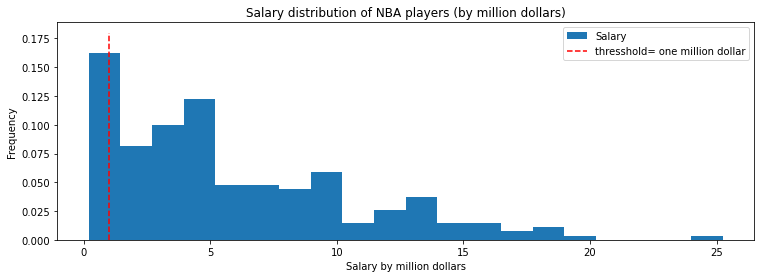

In [16]:
#salary distribution
figsize(12.5, 4)
(df['Salary']).plot(kind='hist',bins =20, density=True)
plt.vlines(1, 0, 0.18, linestyle='--', color='red', label='thresshold= one million dollar')
plt.xlabel('Salary by million dollars')
plt.title('Salary distribution of NBA players (by million dollars)')
plt.legend()
plt.show()

Contrary to our initial belief, a considerable amount of players are paid less than 1 million per year. The majority of players get less than 10 million a year. 

This picture also shows a small number of players who get more than 20 million per year. Let us see the top 10 most paid players.

In [17]:
#top ten most paid players
df[['Player','Salary']].sort_values('Salary', ascending=False ).iloc[:10]

,Player,Salary
24,Kobe Bryant,25.244493
206,Carmelo Anthony,19.444504
25,Pau Gasol,18.714150
0,Blake Griffin,18.668431
176,Rudy Gay,17.888932
196,Deron Williams,17.177795
207,Amar'e Stoudemire,16.486611
1,Chris Paul,16.441500
104,Derrick Rose,16.402552
195,Joe Johnson,16.324500


In this list, Kobe Bryan clearly stands out. 

**Question: What about the salary distribution accross different positions?**

Is a player's salary depends on his position? Let us answer this question from the given data.

In [18]:
#first, let us get a statiscal summary of the salary across different groups.
df.groupby('Position')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Center,50.0,5.892291,4.746355,0.788872,1.42463,4.649647,9.658537,18.714150
Forward,86.0,6.067205,4.685046,0.473604,2.82229,4.500000,8.475000,19.444504
Guard,80.0,5.607286,4.872246,0.200000,1.60000,4.463500,8.000000,25.244493


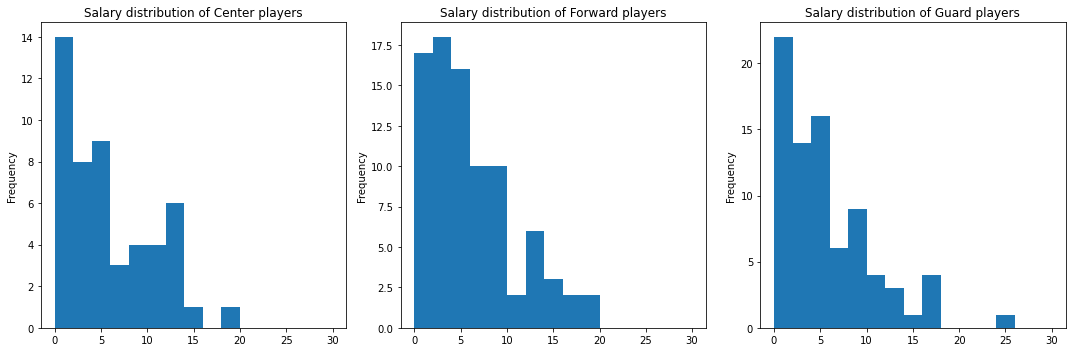

In [20]:
#distribution of the salary across different positions.
fig, axes = plt.subplots(1, 3)
position=['Center', 'Forward', 'Guard']
for c in [0,1,2]:
    (df[df['Position']==position[c]]['Salary']).plot(kind='hist', ax=axes[c], bins =15, 
                                                          title=f"Salary distribution of {position[c]} players",
                                                            figsize=(15,5), range=[0,30])
    plt.tight_layout()
plt.show()

Overall, it seems that those who play to forward position are paid slightly more than players at other positions. This kind of makes sense because forward players seem to score more often than others. See this wikipedia link for more information. 

https://en.wikipedia.org/wiki/Basketball_positions

**Question: Which team pays the most to its players?**

In [27]:
top_5

Team
Boston Celtics           8.256454
Brooklyn Nets            7.819549
Chicago Bulls            7.361437
Golden State Warriors    7.236611
New York Knicks          7.173049
Name: Salary, dtype: float64

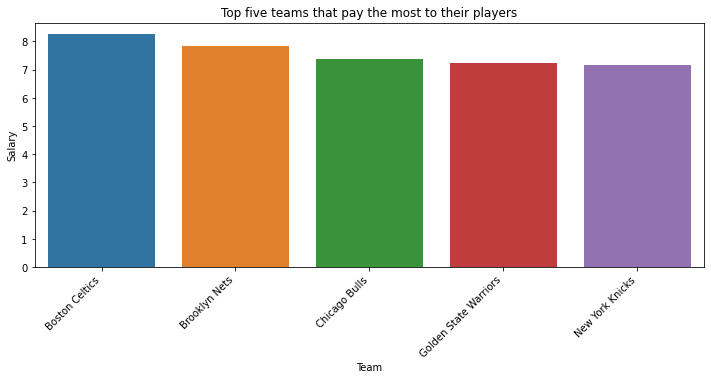

In [31]:
#top five clubs that on average pay the most to their players.
figsize(12,4.5)
top_5=df.groupby('Team')['Salary'].mean().sort_values(ascending=False).iloc[:5]
bar=sns.barplot(x=top_5.index, y=top_5)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Top five teams that pay the most to their players")
plt.show()

On average, Boston Celtics team pays the most to its players. Let us dig deeper into the salary of its players.

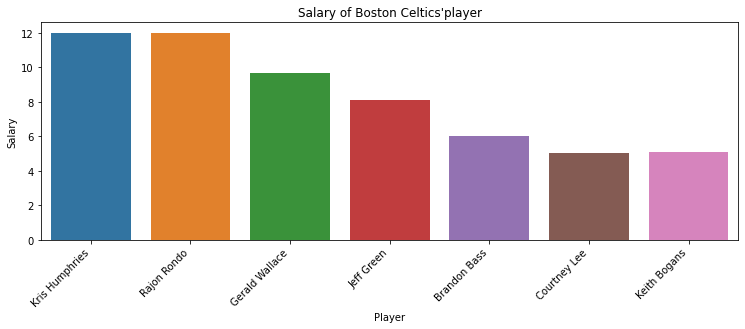

In [33]:
figsize(12.5,4)
boston=df[df['Team']=="Boston Celtics"].set_index("Player")
bar=sns.barplot(x=boston.index, y=boston['Salary'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Salary of Boston Celtics'player")
plt.show()

We note that the least paid players at Boston Celtics already got more than 5 million dollars!

**Question: Do longer contracts mean higher salary?**

Let us investigate the relation between the length of a contract and the salary.

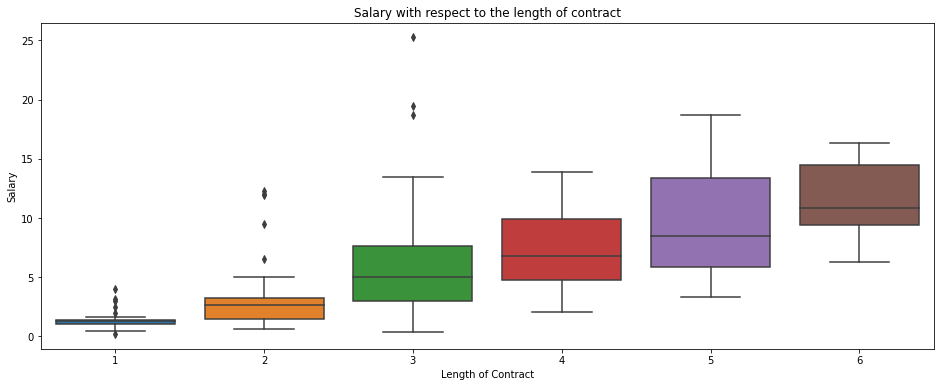

In [47]:
#salary distribution across different lengths of the contracts
figsize(16,6)
sns.boxplot(data=df, x='Length of Contract', y='Salary')
plt.title("Salary with respect to the length of contract")
plt.show()

It is clear that more extended contracts often imply a higher salary. 

The data also suggests that most players sign 2-4 years contract. It kind of makes sense because

(1) Players would avoid signing a one-year contract. 

(2) Teams would avoid signing a contract for a long time as players might have trouble keeping the same level. 

Furthermore, there are nine players with 6-year contracts. Let's take a look at who they are and their salaries. 

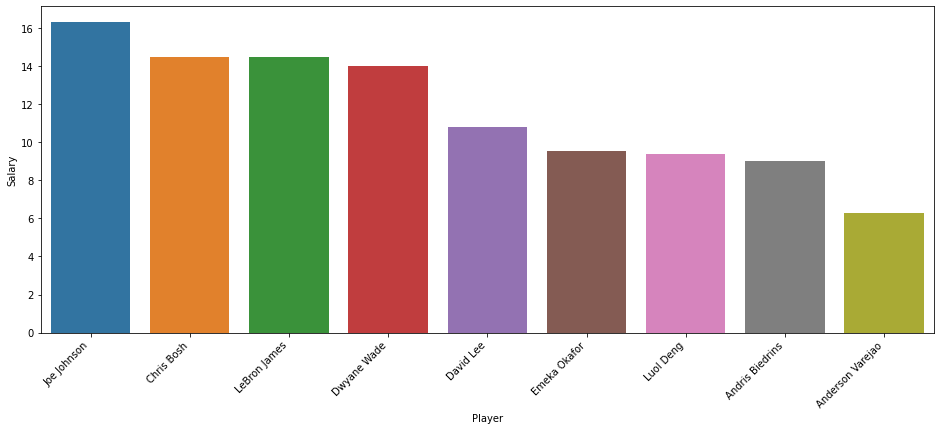

In [51]:
six_year_df=df[df['Length of Contract']==6][['Player', 'Year', 'Salary']]
six_year_df.sort_values('Salary', ascending=False, inplace=True)
bar=sns.barplot(x=six_year_df['Player'], y=six_year_df['Salary'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Question: What is the distribution of players'age?**

First, let us take a look at the youngest and oldest players (at the time the information is collected)

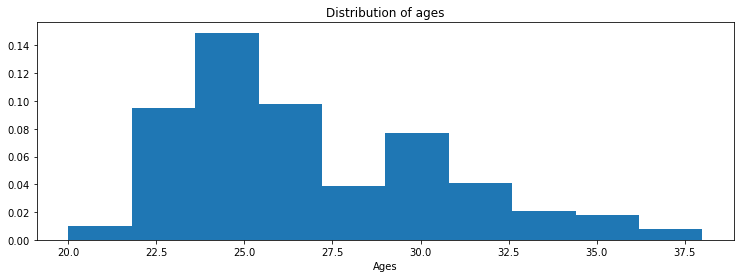

In [55]:
figsize(12.5,4)
plt.hist(df['Age'], bins=10, density=True)
plt.xlabel('Ages')
plt.title("Distribution of ages")
plt.show()

We observe that the youngest age is 20 and the oldest one is 38. Furthermore, most players'ages are in the range 22- 27.

**Question: Which players are paid the most for their 1-minute plays?**

Paying a huge amount of money, teams want to see their players play regularly (and play well!). Let us see how much teams have to pay for their players each minute of play. 

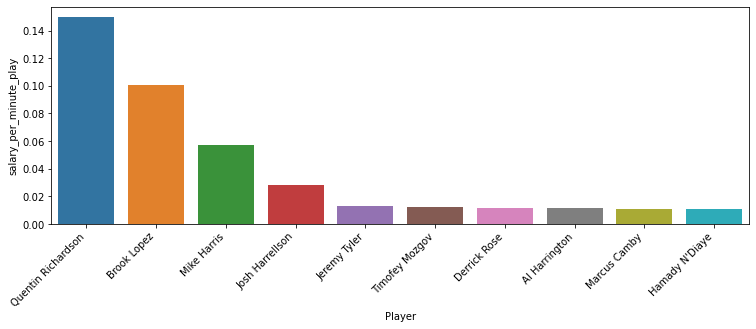

In [62]:
minute_df=df.copy()[['Player', 'G', 'Salary']]
minute_df['total_time']=df['MP']*df['G'] #total time played 
minute_df['salary_per_minute_play']=minute_df['Salary']/minute_df['total_time'] #salary per minute played
minute_df.sort_values('salary_per_minute_play', ascending=False, inplace=True)
top_10=minute_df.head(10)
bar=sns.barplot(x=top_10['Player'], y=top_10['salary_per_minute_play'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Let us take a closer look at this variable.

In [63]:
minute_df.head(10)

,Player,G,Salary,total_time,salary_per_minute_play
185,Quentin Richardson,1,4.347184,29.0,0.149903
198,Brook Lopez,5,13.668750,136.0,0.100506
86,Mike Harris,4,0.916099,16.0,0.057256
103,Josh Harrellson,6,0.884293,31.2,0.028343
215,Jeremy Tyler,21,0.884293,67.2,0.013159
65,Timofey Mozgov,41,4.400000,364.9,0.012058
104,Derrick Rose,39,16.402552,1376.7,0.011914
161,Al Harrington,10,1.399507,119.0,0.011761
181,Marcus Camby,24,2.763054,249.6,0.011070
42,Hamady N'Diaye,16,0.884293,80.0,0.011054


We see that  Richardson is paid the most for each minute play, he actually played very little. Instead of looking at these top paid players, let us take a look at the whole data set. 

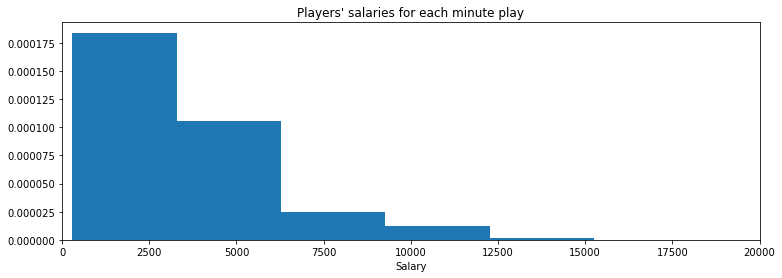

In [75]:
figsize(12.5,4)
plt.hist(minute_df['salary_per_minute_play']*10**6, bins=50, density=True)
plt.xlim(0,20000)
plt.xlabel("Salary")
plt.title("Players' salaries for each minute play")
plt.show()

The majority of players earn 2000-5000 per minutes. 

**Question: On average, how long does it take a player to make a shoot?**

Teams also want their players to shoot often and score. How long does it take to make a shoot? Let us investiate this question. 

In [77]:
#create a data frame to record how long it takes a player to make a shoot.
time_to_shoot=df.copy()[['Player', 'Salary', 'G', 'MP', 'FG']]
time_to_shoot['time_to_make_a_shoot']=df['MP']/df['FG']
time_to_shoot.head()
time_to_shoot.sort_values('time_to_make_a_shoot').head(5)

,Player,Salary,G,MP,FG,time_to_make_a_shoot
198,Brook Lopez,13.668750,5,27.2,7.6,3.578947
24,Kobe Bryant,25.244493,82,33.9,9.0,3.766667
128,LeBron James,14.500000,76,39.0,10.1,3.861386
129,Dwyane Wade,14.000000,77,36.3,9.3,3.903226
51,Russell Westbrook,13.688750,66,35.3,8.8,4.011364


While Brook Lopez appears to be the most efficient shooter, we notice that he only played five games. Perhaps, we should only consider players who played a significant number of games. For example, let us only consider players who played at least 40 games.

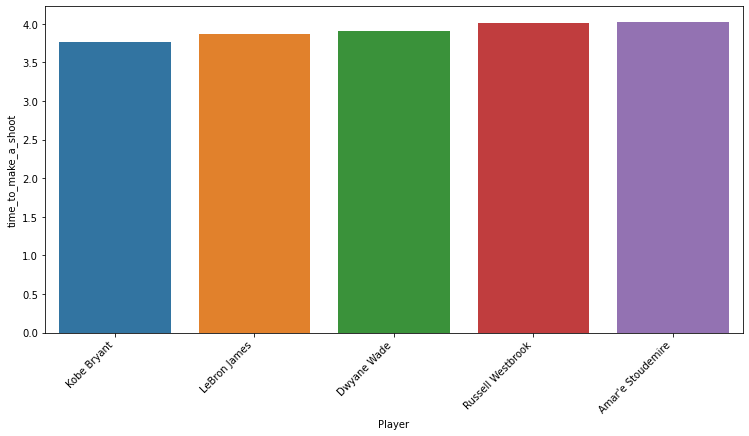

In [79]:
figsize(12.5, 6)
top_shoot=time_to_shoot[time_to_shoot['G']>=40].sort_values('time_to_make_a_shoot').head(5)
bar=sns.barplot(x=top_shoot['Player'], y=top_shoot['time_to_make_a_shoot'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Now, this makes sense! Kobe Bryan and LeBron James need the least amount of time to make a shoot. 

We can also plot the distribution of this variable to have a more complete picture.

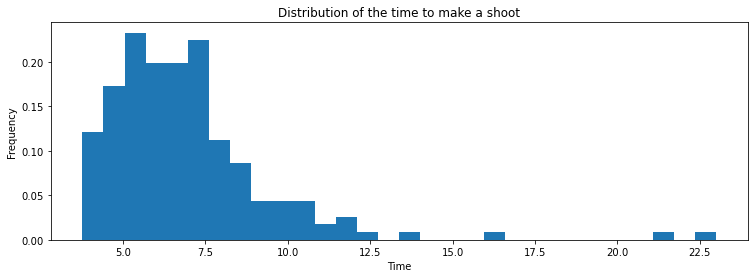

In [83]:
figsize(12.5,4)
time_to_shoot[time_to_shoot['G']>=40]['time_to_make_a_shoot'].plot(kind='hist', bins=30, density=True)
plt.xlabel("Time")
plt.title("Distribution of the time to make a shoot")
plt.show()

We see that for the majority of players, it takes them 3-7 minutes to make a shoot. 

**Question: Which players are more likely to start a games?** 

There are four quarters in a NBA game. There are many reasons to expect that a coach would put the strongest team from the beginning. Can we confirm this from the data?

In [84]:
start_df=df.copy()[['Player', 'Position', 'G', 'Salary', 'GS']]

One way to look at this question is to look at the number of games started for each player. 

In [85]:
#sort by the number of games started
start_df[['Player', 'GS']].sort_values('GS', ascending=False).head(10)

,Player,GS
54,Thabo Sefolosha,82
25,Pau Gasol,82
24,Kobe Bryant,82
207,Amar'e Stoudemire,82
119,O.J. Mayo,82
19,Emeka Okafor,82
177,DeMar DeRozan,82
13,David Lee,81
0,Blake Griffin,80
176,Rudy Gay,80


Another way to answer this question is to look at the percentile of times a player starts the game (for example, we should take into account the fact that if a player cannot play a game, he will not be able to start the game!)

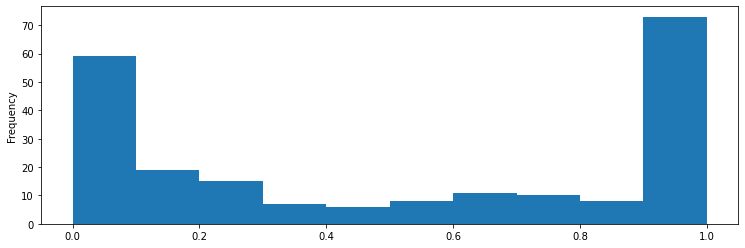

In [94]:
figsize(12.5,4)
start_df['percentile_start']=start_df['GS']/start_df['G']
start_df['percentile_start'].plot(kind='hist')
plt.show()

We see that this distribution has two heavy tails. This kind of makes sense because the best combinations are usually stable over the season. Consequently, some players will always start while others will play later in the games. 

There are 60 players who start all the time. Let us dig deeper to see their positions.

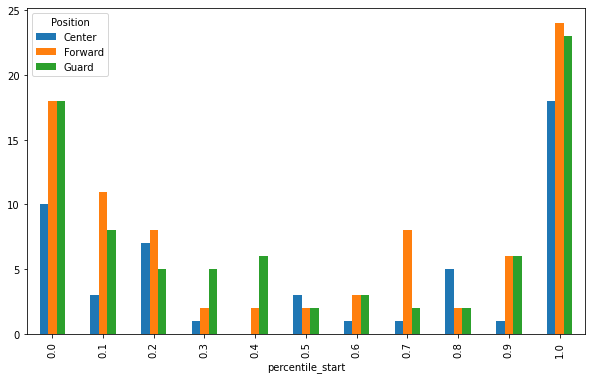

In [101]:
figsize(12.5,4)
start_df['percentile_start']=round(start_df['GS']/start_df['G'],1)
start_df.groupby('percentile_start')['Position'].value_counts().unstack().plot(kind='bar', figsize=(10,6))
plt.show()

There does not seem to be any differences between groups.

**Question: Which players are most effective at shooting beyond the 3-point line?**

One of the exciting performance in NBA is the precision of shooting beyond the 3-point line. Who is the king for this special skill? Let us answer this question from our data. First, we look for the top five players for shooting beyond the 3-point line.

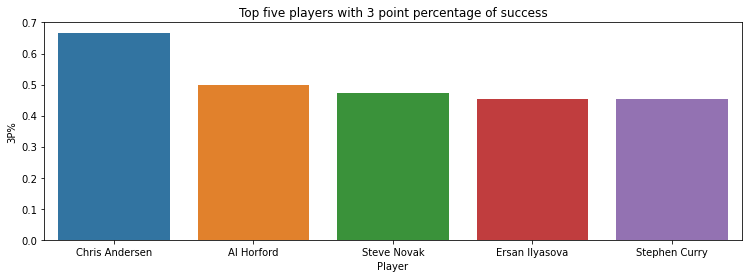

In [117]:
figsize(12.5,4)
top_5_three_point=df.sort_values('3P%', ascending=False).head(5)
bar=sns.barplot(x=top_5_three_point['Player'], y=top_5_three_point['3P%'])
plt.title('Top five players with 3 point percentage of success')
plt.show()

We see that Chris Andersen is really good: his 3-point precision average is more than 70%. 

What about the overall performance? 

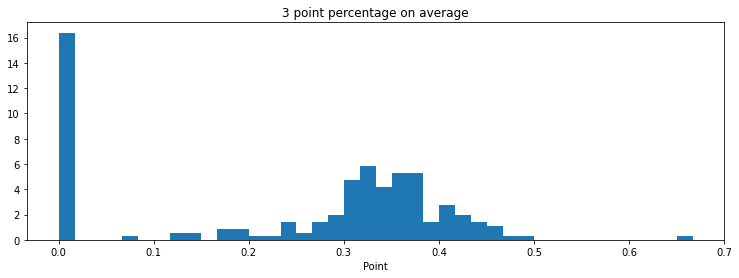

In [118]:
figsize(12.5,4)
plt.hist(df['3P%'], bins=40, density=True)
plt.title("3 point percentage on average")
plt.xlabel("Point")
plt.show()

It is real surprise to use that the majority of success is in the range 30-45% (we thought that it would be a lower range.)

**Question: What is the successful rate of free throws?**

Even though it is expected, we are still amazed by how players are so good with free throws. According to wikipedia, 
most players make 70-80% of their attempts. 

https://en.wikipedia.org/wiki/Free_throw

Let check this statement using our dataset.

In [124]:
df['FT%'].describe()

count    216.000000
mean       0.751907
std        0.112402
min        0.365000
25%        0.707750
50%        0.769500
75%        0.824500
max        1.000000
Name: FT%, dtype: float64

So, the mean is 75%. How confident we are about the wikipedia's statement mentioned above? We can use confidence interval to answer this question.

In [125]:
sms.DescrStatsW(df['FT%']).tconfint_mean(alpha=0.01)

(0.73203105752532, 0.7717837572894949)

Since this confidence interval is contained in the range [70,80], Wikipedia's claim seems convincing.

Now, Wikipedia also claims that some famous players are notoriously bad at free throws. Let us see who they are (to single out irrelevant information, we say that a player is outstanding if his salary is at least ten million.)

In [132]:
free_throw_df=df.copy().sort_values('FT%', ascending=True)
free_throw_df[free_throw_df['Salary']>10][['Player', 'FT%', 'Salary']].head(10)

,Player,FT%,Salary
96,Josh Smith,0.517,13.500000
14,Andre Iguodala,0.574,12.868632
198,Brook Lopez,0.625,13.668750
170,Rajon Rondo,0.645,11.954545
0,Blake Griffin,0.660,18.668431
113,Andrew Bynum,0.692,12.250000
87,Roy Hibbert,0.711,13.668750
157,Nene,0.711,13.000000
208,Tyson Chandler,0.732,13.107838
105,Carlos Boozer,0.742,14.400000


We see that, in particular, that Blake Griffin and Josh Smith is not good at free throws.

**Question: On average, which players score the most number of points?**

This information is contained in the column PTS. Let us dig deeper into it.

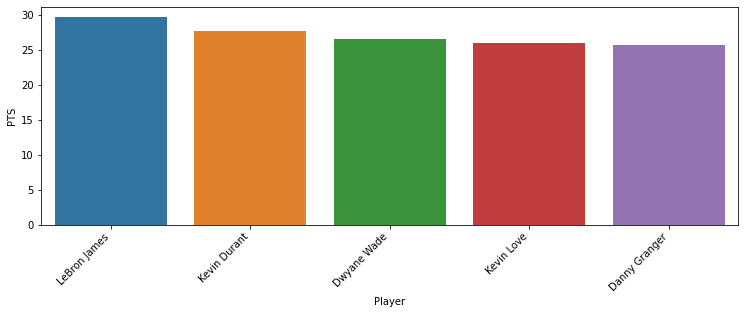

In [134]:
#top 5 players who scored the most 
figsize(12.5,4)
top_5_score=df.sort_values('PTS', ascending=False)[['Player', 'PTS']].head(5)
bar=sns.barplot(x=top_5_score['Player'], y =top_5_score['PTS'])
bar.set_xticklabels(bar.geat_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

So, LeBron James is the most effect player in term of getting scores for his team. 

Are there differences between scores made by different positions?

In [31]:
df.groupby('Position')['PTS'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
Center,50.0,8.982000,5.771983,0.9,4.90,8.30,12.450,24.0
Forward,86.0,11.280233,6.054824,0.6,7.45,10.40,14.425,29.7
Guard,80.0,11.601250,5.614121,2.0,7.45,11.05,14.950,26.6


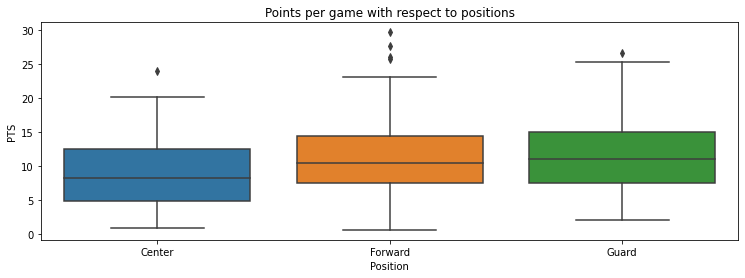

In [137]:
figsize(12.5,4)
sns.boxplot(data=df, x='Position', y=df['PTS'])
plt.title("Points per game with respect to positions")
plt.show()

Guard/Forward positions score more points than Center position. Is the difference statistically significant. We can plot two histograms to partially answer this question.

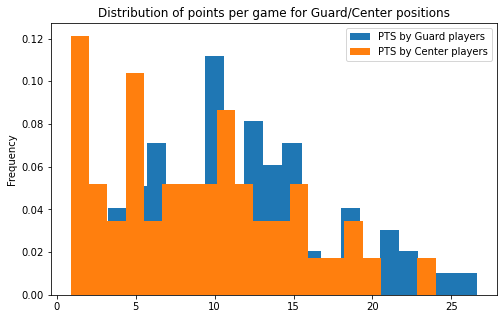

In [139]:
plt.figure(figsize=(8,5))
df[df['Position']=='Guard']['PTS'].plot(kind='hist', bins=20, density=True, label='PTS by Guard players')
df[df['Position']=='Center']['PTS'].plot(kind='hist',bins=20, density=True, label='PTS by Center players')
plt.legend(loc='upper right')
plt.title("Distribution of points per game for Guard/Center positions")
plt.show()

The above histograms clearly show that Guard Players score more than Center Player. However, it does not seem that the difference is statiscally significant.

**Question: What is the relation between different statistics?**

We can use a heat map to visualize the linear relationship between pairwise varibles. Since we have a large set of features, we will only plot some of them.

In [160]:
df.columns

Index(['Year', 'Player', 'Position', 'Team', 'Salary', 'Length of Contract',
       'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'MP_1', 'PER', 'TS%', 'eFG%', 'FTr', '3PAr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg',
       'DRtg', 'OWS', 'DWS', 'WS', 'WS/48'],
      dtype='object')

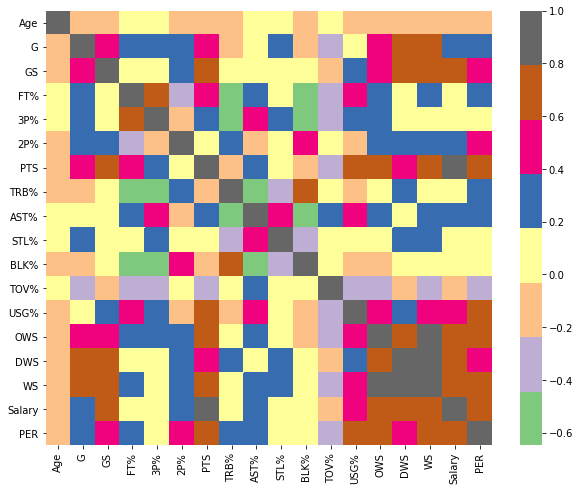

In [176]:
figsize(10, 8)
corr = df[['Age', 'G', 'GS', 'FT%', '3P%', '2P%', 'PTS', 'TRB%', "AST%",  
            'STL%', 'BLK%', 'TOV%', 'USG%','OWS', 'DWS', 'WS', 'Salary', 'PER' ]].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap='Accent')
plt.show()

We see that the following pairs are strongly linearly correlated (the list is not exclusive)

(1) Points (PTs) and Game Start (GS). This makes sense because the cofounding factor for these two variables is a player's performance. Excellent players often start early and, at the same time, score lots of points. 

(2) 3P% and FT%. 

(3) Block percentage (BLK%) and Total rebounds average (TRB%). This is expected. 

(4) Usage Percentage (USG%) and Points (%). Again, this makes sense because the more a player plays, the more chances he has to score. 

(5) The following statistics are strongly correlated to the Salary variable: GS, OWS, DWS, WS, PER. Except for GS, all other variables are not raw; they are derived from other statistics.

(6) PER (Player efficiency rating) and PTS (Points) are postively correlated to several other variables.  


Let us use scatterplots to visuallize some of these relations.

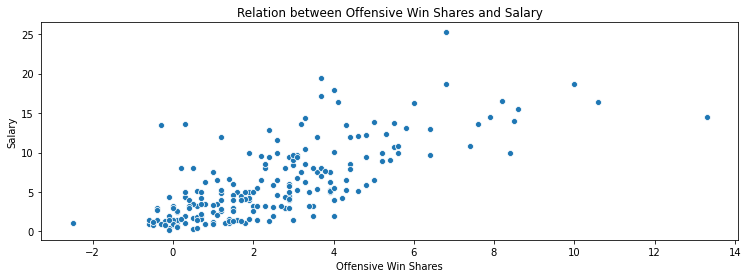

In [175]:
#Relationship between Offensive Win Shares and Salary
figsize(12.5, 4)
sns.scatterplot(x=df['OWS'], y=df['Salary'])
plt.xlabel("Offensive Win Shares")
plt.title("Relation between Offensive Win Shares and Salary")
plt.show()

We see that there is clear positively linear relationship between offensive win shares and Salary.

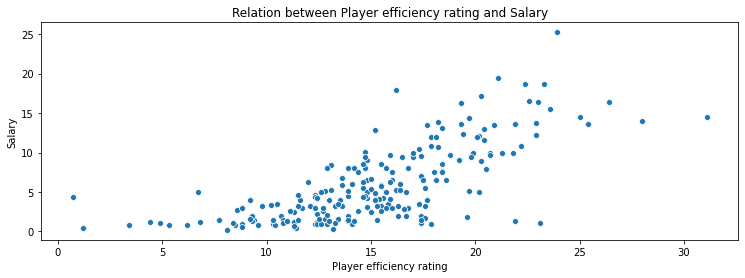

In [178]:
#Relationship between Offensive Win Shares and Salary
figsize(12.5, 4)
sns.scatterplot(x=df['PER'], y=df['Salary'])
plt.xlabel("Player efficiency rating")
plt.title("Relation between Player efficiency rating and Salary")
plt.show()

Again, there is a clear linear trend here. 

# Part 2: Data Engineering

We note that there are several categorical variables in our dataset, such as Position, Team. Machine learning models are often not able to use categorical variables directly. Consequently, we need to transform them into numeric values. We also note that while there are only three categories in the Position variable, there are 25 different teams in the Team variable. To avoid the curse of dimensionality, we will only use the Position variable for our model. We can use the get_dummies method in pandas to transform categorical variables into numeric variables.


In [141]:
dummies = pd.get_dummies(df['Position'], drop_first=True) 
dummies.head()

,Forward,Guard
78,0,0
192,0,0
181,1,0
213,0,0
3,0,0


We then add these new variables to our data frame.

In [149]:
new_df=pd.concat([df, dummies], axis=1)

Next, we will normalize our data. There are several advantages to do so, including but not limited to the following.

(1) All features are on the same scale which makes it easier to interpret the results of our models.

(2) It will be less computationally expensive to train our models. Sometimes, it can prevent the loss function from getting stuck at local maxima. 

(3) Normalized data makes it easier to deal with outliers. 

There are two main methods to normalize the data: normalization and standardization. See here for a discussion about the difference between these two approaches. 

https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

For this project, we use standardization to normalize our data. Before we do so, let us pose an important question:

We will normalize the training set and use the mean/sample variance from the training set to transform the test set. In other words, we first compute $\mu_{train}$ and $\sigma_{train}$ from the training set. We then use this to transfrom the test set

$$X_{normalized-test}=\frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

In [150]:
#select the numeric variables from the data set
X=new_df.copy().drop(['Salary', 'Year', 'Position', 'Team', 'Player', 'WS/48'], axis=1)
y=new_df['Salary']
#split the dataset into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#use the training set for standardization
scaler = preprocessing.StandardScaler().fit(X_train)

In [151]:
#use the training set for standardization
scaler = preprocessing.StandardScaler().fit(X_train)

#transform the training/test sets using the above scaler obtained above
X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

# Part 3: Build and evaluate machine learning models.

In this part, we will develop several machine learning models to predict the salary of an NBA player. First, we will start with a simple model: linear regression.

# Part 3.1: Linear Regression model.

First, we simply train a standard linear regression model.

In [40]:
#train a linear regression model on the training set
linear_model_0=LinearRegression()
linear_model_0.fit(X_train_scaled, y_train)

LinearRegression()

First, let take a look at the coefficients of this model.

In [41]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(linear_model_0.coef_))],axis = 1)
coefficients.columns=['name', 'coefs']
coefficients.set_index('name', inplace=True)
coefficients.sort_values('coefs', inplace=True)
coefficients.transpose()

name,PTS,OWS,FGA,TRB,DWS,2P,TS%,DRB%,FG%,PER,...,ORB,ORtg,3PA,eFG%,DRB,TRB%,FTA,2PA,WS,FG
coefs,-22.070623,-8.132219,-7.57385,-6.356536,-6.257182,-5.416736,-3.237505,-3.118127,-2.928774,-2.158734,...,1.613702,2.715017,2.868977,3.09009,4.632052,4.832696,5.117372,5.713704,13.322308,24.785756


Let us plot the size of these coefficients.

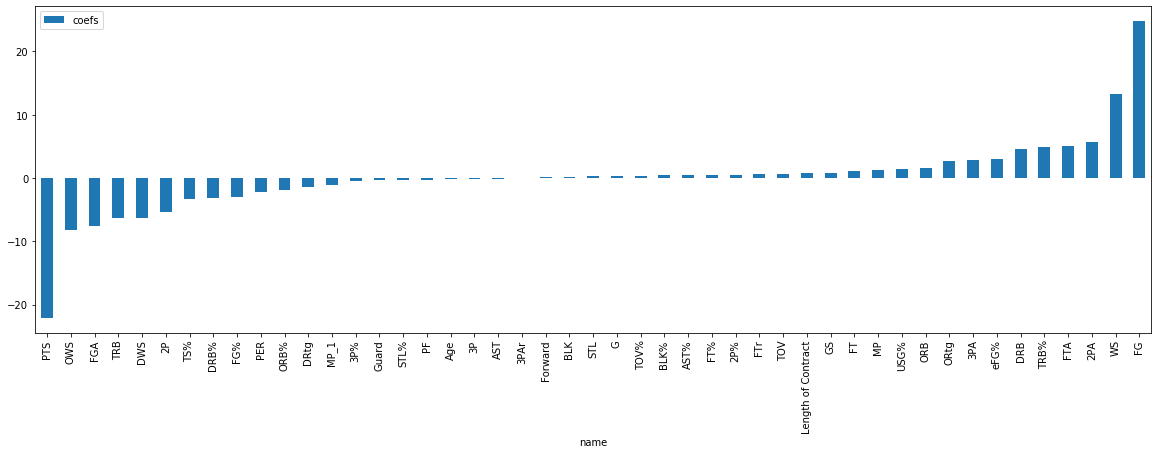

In [42]:
coefficients.plot(kind='bar', figsize=(20,6))
plt.show()

While it is reasonable to expect that the coefficients of 'WS' (win share) and 'FG' (field goals) are positive, it is rather counter-intuitive to see that the coefficients of PTS (points scored per game) and FGA (field goals attempted) are negative (note that even though our data is normalized, the sign of the coefficients in a linear regression would be the same as if we fit a linear regression model on the original data.) This might be a sign that the linear regression model is not strong enough to solve this problem. Anyway, let us dig deeper to the results of this model.

In [43]:
#use this model to predict the salary on the training set 
train_prediction_0= linear_model_0.predict(X_train_scaled)
test_prediction_0=linear_model_0.predict(X_test_scaled)

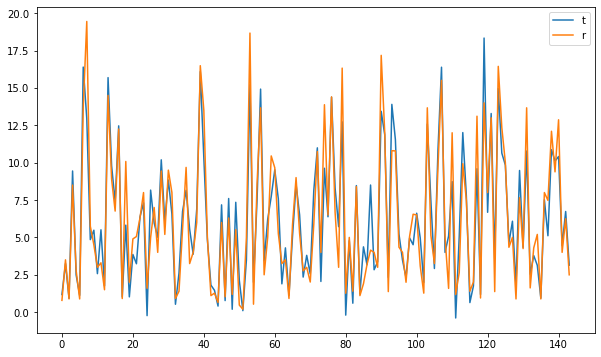

In [44]:
#plot the difference between the model and the true value of y.
plt.figure(figsize=(10,6))
plt.plot(range(len(train_prediction_0)), train_prediction_0)
plt.legend('prediction')
plt.plot(range(len(train_prediction_0)), y_train)
plt.legend('true value')
plt.show()

So, it seems that the model performs pretty well most of the time. We can also quantify by computing other metrics. For example, we can compute the root mean square error.

In [45]:
np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_prediction_0))

1.6942994114816894

We can also compute the $R^2$ score of this model. 

In [46]:
sklearn.metrics.r2_score(y_train, train_prediction_0)

0.8650006488437144

This is not too bad. Let us compute the corresponding scores for the test set. First, let us compute the root mean square error.

In [47]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_prediction_0))

3.002727744424788

This is significantly higher than the error on the training set (we remark that the unit for the salary is million dollars.) Let us check the $R^2$-score on the test set.

In [48]:
sklearn.metrics.r2_score(y_test, test_prediction_0)

0.627306051948216

This is not as good as the score on the traing set. Let us figure out ways to solve this problem. First, we can argue that our model is overfitting the data. One way to deal with overfitting is to regularize our model. For example, we can use $L^2$ penalty to deal with overfitting.

In [49]:
linear_model_1=Ridge()
linear_model_1.fit(X_train_scaled, y_train)

Ridge()

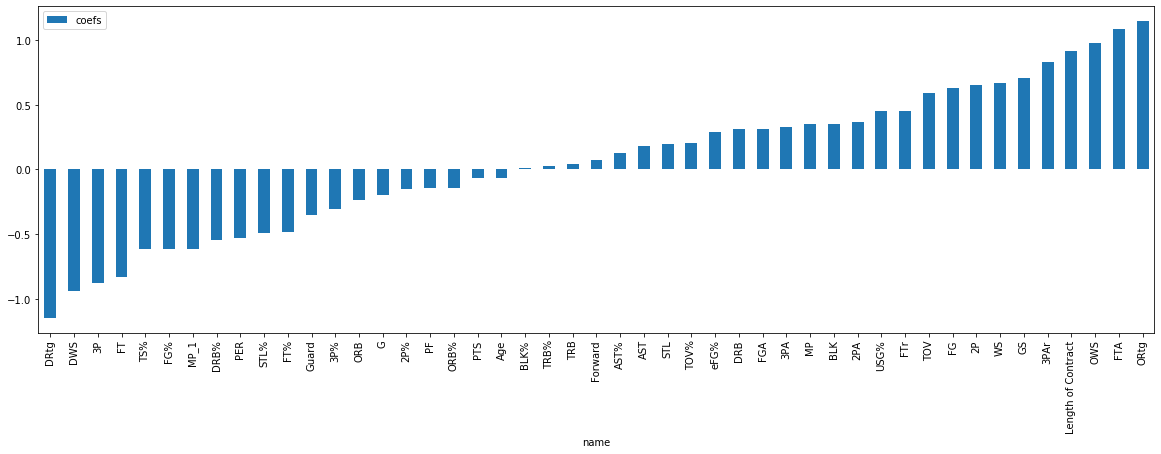

In [50]:
#coefficients of Ridge regression models
ridge_coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(linear_model_1.coef_))],axis = 1)
ridge_coefficients.columns=['name', 'coefs']
ridge_coefficients.set_index('name', inplace=True)
ridge_coefficients.sort_values('coefs', inplace=True)
ridge_coefficients.plot(kind='bar', figsize=(20,6))
plt.show()

We see that for Ridge regression, the coefficients are significantly smaller than the coefficients of the corresponding linear regression model.

In [51]:
#use this model to predict the salary on the training/test sets
train_prediction_1= linear_model_1.predict(X_train_scaled)
test_prediction_1=linear_model_1.predict(X_test_scaled)

In [52]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_prediction_1))}")
print(f"The  R-square score on the training set is {sklearn.metrics.r2_score(y_train, train_prediction_1)}")

The RMSE on the traing set is 1.7515034789357788
The  R-square score on the training set is 0.8557308843164174


These scores are rather similar to those we get from a standard linear regression model. Let us evaluate the corresponding scores on the test set.

In [53]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_prediction_1))}")
print(f"The  R-square score on the test set is {sklearn.metrics.r2_score(y_test, test_prediction_1)}")

The RMSE on the test set is 2.760129875869276
The  R-square score on the test set is 0.6850950677051559


Great! Both the RMSE score and the R-square score are better than the previous ones. 

In the above approach, we used all the variables to train our models. It is often the case that some variables are statistically more significant than others. The signifance of a feature can be measured by the p-value of its coefficients. Unfortunately, sklearn does not provide a convenient way to compute these p-values. We will use the stat libary instead. 

In [54]:
X_train_2 = sm.add_constant(X_train)
X_test_2=sm.add_constant(X_test)
linear_model = sm.OLS(y_train, X_train_2)
linear_model_2 = linear_model.fit()


/Users/hapham/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
print(linear_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     13.09
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.12e-25
Time:                        23:17:25   Log-Likelihood:                -280.25
No. Observations:                 144   AIC:                             656.5
Df Residuals:                      96   BIC:                             799.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 21.1781     16

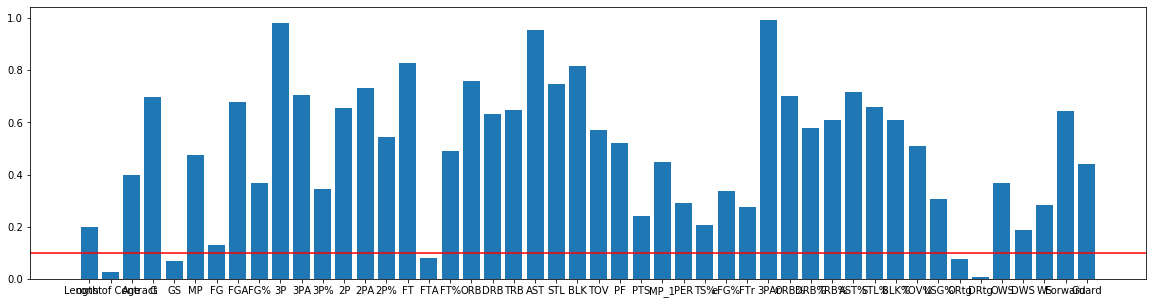

In [56]:
p_values=linear_model_2.pvalues
#barplot the p value of every feature of this model
fig= plt.figure(figsize=(20,5))
plt.bar(range(len(p_values)), list(p_values), align='center' )
plt.axhline(y=0.1, color='r', linestyle='-') #significant level 0.1
plt.xticks(range(len(p_values)), p_values.index)
plt.show()

In [57]:
#filter out variables with p-values <0.5
p_values[p_values<0.5].index

Index(['const', 'Length of Contract', 'Age', 'GS', 'MP', 'FG', 'FG%', '3P%',
       'FTA', 'FT%', 'PTS', 'MP_1', 'PER', 'TS%', 'eFG%', 'FTr', 'USG%',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS', 'Guard'],
      dtype='object')

We will use the above features to train a new linear regression model.

In [58]:
linear_model = sm.OLS(y_train, X_train_2[['const', 'Length of Contract', 'Age', 'GS', 'MP', 'FG', 'FG%', '3P%',
       'FTA', 'FT%', 'PTS', 'MP_1', 'PER', 'TS%', 'eFG%', 'FTr', 'USG%',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS', 'Guard']])
linear_model_3 = linear_model.fit()

In [59]:
train_prediction_3= linear_model_3.predict(X_train_2[['const', 'Length of Contract', 'Age', 'GS', 'MP', 'FG', 'FG%', '3P%',
       'FTA', 'FT%', 'PTS', 'MP_1', 'PER', 'TS%', 'eFG%', 'FTr', 'USG%',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS', 'Guard']])
test_prediction_3= linear_model_3.predict(X_test_2[['const', 'Length of Contract', 'Age', 'GS', 'MP', 'FG', 'FG%', '3P%',
       'FTA', 'FT%', 'PTS', 'MP_1', 'PER', 'TS%', 'eFG%', 'FTr', 'USG%',
       'ORtg', 'DRtg', 'OWS', 'DWS', 'WS', 'Guard']])

In [60]:
print(f"The RMSE on the training set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_prediction_3))}")
print(f"The  R-square score on the training set is {sklearn.metrics.r2_score(y_train, train_prediction_3)}")

The RMSE on the training set is 1.8629597314769721
The  R-square score on the training set is 0.8367856663310419


In [61]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_prediction_3))}")
print(f"The  R-square score on the test set is {sklearn.metrics.r2_score(y_test, test_prediction_3)}")

The RMSE on the test set is 2.8480261675758785
The  R-square score on the test set is 0.6647194366125044


It seems that this new model performs pretty much the same as the first one. In other words, amongst three models developed so far, the regularized model performs the best.

# Part 3.2: KNN models

It is reasonable to expect that players with similar statistics should have similar salary. This is especially true in an ideal capital market: if a player feels that he is underpaid, he can simply change the team. We are well aware that the market is far from ideal. A lot of "soft" factors can affect a player's salary: advertisement, brands, negatiation skills etc. 

The question is: how can we measure similarity between players? In other words, what is a good metrics for measuring similarity? K-Nearest Neighborhoods algorithm provides an answers this question. More precisely, KNN measure distance between two features vectors. There are several distance formulas are used in practice. For this project, we will use the $L^2$ norm, i,e for two vectors $x=(x_1,\ldots,x_n)$, $y=(y_1, \ldots, y_n)$ their distance is computed by 

$$d(x,y)=\sqrt{(\sum_{i=1}^n (x_i-y_i)^2} $$



In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
knn_model_0=KNeighborsRegressor(n_neighbors=5)
knn_model_0.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [64]:
train_prediction_0=knn_model_0.predict(X_train_scaled)
test_prediction_0=knn_model_0.predict(X_test_scaled)

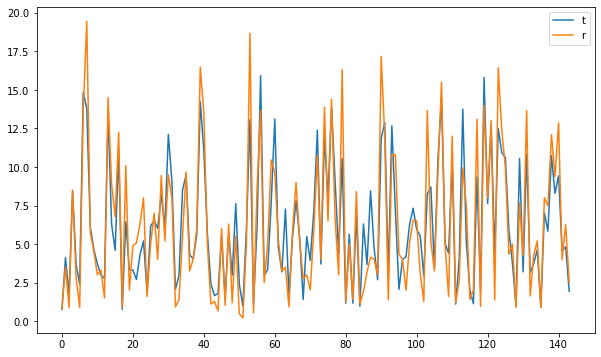

In [65]:
#plot the difference between the model and the true value of y.
plt.figure(figsize=(10,6))
plt.plot(range(len(train_prediction_0)), train_prediction_0)
plt.legend('prediction')
plt.plot(range(len(train_prediction_0)), y_train)
plt.legend('true value')
plt.show()

It does not appear that this model performs well on the traing set. We can also quantify the errors.

In [66]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_prediction_0))}")

The RMSE on the traing set is 1.9938760111989509


In [67]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_prediction_0))}")

The RMSE on the test set is 2.546164046360504


In the above approach, we have choosen the parameters rather arbitrary. Instead, we can plot the performance of KNN-model on a list of chosen hyperparameter.

In [68]:
n_neighbors=range(1,21)
train_errors=[]
test_errors=[]
for n in n_neighbors:
    knn=KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    train_pred=knn.predict(X_train_scaled)
    test_pred=knn.predict(X_test_scaled)
    train_errors.append([n, np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_pred))])
    test_errors.append([n, np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))])

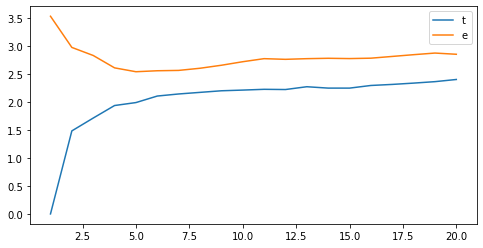

In [69]:
plt.figure(figsize=(8,4))
train_error=[train_errors[i][1] for i in range(len(train_errors))]
test_error=[test_errors[i][1] for i in range(len(test_errors))]
neighbors=[train_errors[i][0] for i in range(len(train_errors))]
train_df=pd.DataFrame(data=train_error, index=neighbors)
plt.plot(train_df)
plt.legend('train')
test_df=pd.DataFrame(data=test_error, index=neighbors)
plt.plot(test_df)
plt.legend('test')
plt.show()

We see that when $n \geq 7$ the training errors and test errors pretty much stay the same ( so the model has low variance and high bias.)

# Part 3.3: Decision tree models.

In this part, we will build and evaluate decision tree regressor models. We recall that a decision tree regressor is constructed by finding split values that minize a cost function. Note that in decision tree models, we do not need to scale the dataset. 

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
#train a decision tree model.
tree_model_0=DecisionTreeRegressor()
tree_model_0.fit(X_train, y_train)

DecisionTreeRegressor()

Note that in the above model, we did not put any restriction on the decision. Consequently, it might happen that this decision tree will overfit our the training set. However, since this is our first model, we will just explore and not worry too much. 

In [72]:
#use the above tree model for prediction
tree_train_prediction_0=tree_model_0.predict(X_train)
tree_test_prediction_0=tree_model_0.predict(X_test)

As before, let us plot the difference between the prediction and the true values on the training set.

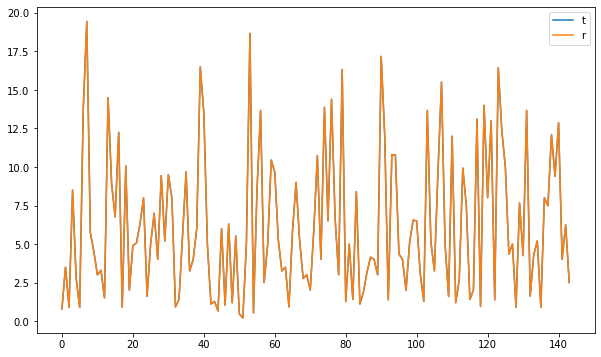

In [73]:
#plot the difference between the model and the true value of y.
plt.figure(figsize=(10,6))
plt.plot(range(len(tree_train_prediction_0)), tree_train_prediction_0)
plt.legend('prediction')
plt.plot(range(len(tree_train_prediction_0)), y_train)
plt.legend('true value')
plt.show()

Question: Where is the blue curve? 

Answer: It perfectly fit the organe curve! In other words, it is very likely that our model is overfitting. We can double check this by computing the root square error. 

In [74]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, tree_train_prediction_0))}")

The RMSE on the traing set is 0.0


Let us evaluate this model on the test set.

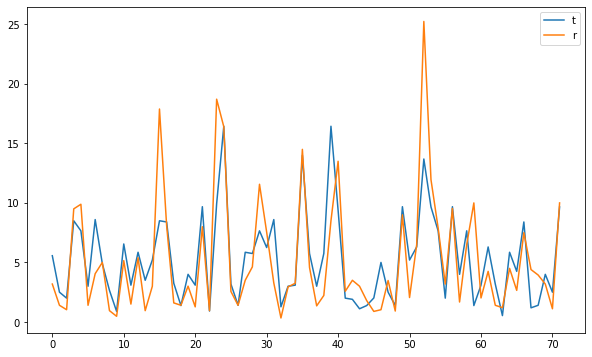

In [75]:
#plot the difference between the model and the true value of y on the test set.
plt.figure(figsize=(10,6))
plt.plot(range(len(tree_test_prediction_0)), tree_test_prediction_0)
plt.legend('prediction')
plt.plot(range(len(tree_test_prediction_0)), y_test)
plt.legend('true value')
plt.show()

We see that the tree model clearly overfits the training set. We can further confirm this by computing the mean square error. 

In [76]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, tree_test_prediction_0))}")

The RMSE on the traing set is 3.0552546258515063


To avoid overfitting, we can try to regularize the above model. For example, we can limit the maximum length of the tree or we can impose that we only split a node if there are enough samples inside it. 

In [77]:
#train a decision tree model.
tree_model_1=DecisionTreeRegressor(max_depth=4)
tree_model_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

Before we analyze this model, let us visualize it first.

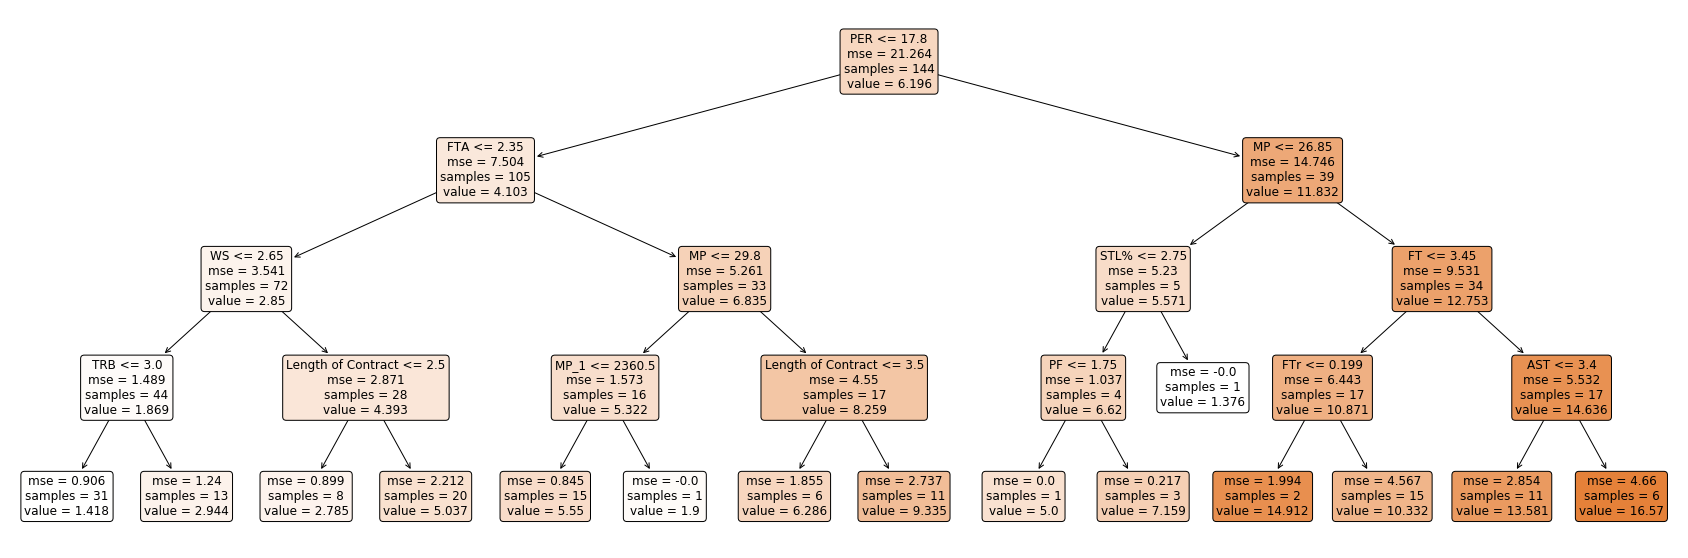

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
a = plot_tree(tree_model_1, 
              feature_names=X_train.columns, 
              #class_names=y.columns, 
              filled=True, 
              rounded=True, 
              fontsize=12)
plt.show()

We see that the first feature used for splitting is the PER (Player efficiency rating)-which kind of makes sense. Next, let us evaluate this model on the training set and the test set.

In [79]:
tree_train_prediction=tree_model_1.predict(X_train)
tree_test_prediction=tree_model_1.predict(X_test)

In [80]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, tree_train_prediction))}")

The RMSE on the traing set is 1.3995553769188247


In [81]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, tree_test_prediction))}")

The RMSE on the test set is 2.614031721458547


This is not too bad in comparison with other models. 

A nice thing about decision tree models is that they provide a list of important features as a by-product. Let us work it out.

<Figure size 720x720 with 0 Axes>

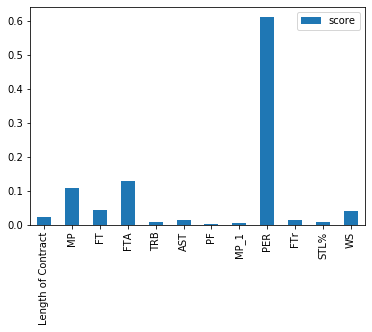

In [82]:
importance= tree_model_1.feature_importances_
importance_df=pd.DataFrame(data=importance, index=X_train.columns, columns=['score'])
importance_df=importance_df[importance_df['score']>0]
importance_df
fig= plt.figure(figsize=(10,10))
importance_df.plot(kind='bar')
plt.show()


As before, we can also try to best value for the max_depth variable.

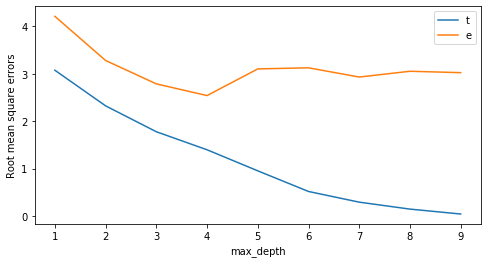

In [83]:
n_neighbors=range(1,10)
train_errors=[]
test_errors=[]
for n in n_neighbors:
    knn=DecisionTreeRegressor(max_depth=n)
    knn.fit(X_train_scaled, y_train)
    train_pred=knn.predict(X_train_scaled)
    test_pred=knn.predict(X_test_scaled)
    train_errors.append([n, np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_pred))])
    test_errors.append([n, np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))])
plt.figure(figsize=(8,4))
train_error=[train_errors[i][1] for i in range(len(train_errors))]
test_error=[test_errors[i][1] for i in range(len(test_errors))]
neighbors=[train_errors[i][0] for i in range(len(train_errors))]
train_df=pd.DataFrame(data=train_error, index=neighbors)
plt.plot(train_df)
plt.legend('training error')
test_df=pd.DataFrame(data=test_error, index=neighbors)
plt.plot(test_df)
plt.legend('test error')
plt.xlabel('max_depth')
plt.ylabel('Root mean square errors')
plt.show()    

This plot suggest that when $n \geq 5$, this tree models tend to overfit the data. 

# Part 3.4: Random Forest

As we can see from the previous section, as soon as $n \geq 5$, the decision tree models tend to overfit our data. To overcome this problem, we can instead train many trees with different sets of features and then take the average of these individual models. That is exactly the idea of random forest. 

In [84]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


As before, let us train a simple random forest model to our dataset. After that, we can optimize the hyperparameters by doing a GridSearch.

In [85]:
rf_model_0=RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
rf_model_0.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, n_jobs=-1)

In [86]:
rf_train_prediction=rf_model_0.predict(X_train)
rf_test_prediction=rf_model_0.predict(X_test)

In [87]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, rf_train_prediction))}")

The RMSE on the traing set is 1.1764812260009043


In [88]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, rf_test_prediction))}")

The RMSE on the test set is 2.6864662635618917


Argurably, this is the best model so far. We wonder we can do better than this. Let us try to do a Gridsearch to find the best parameters for the Random Forest models.

In [89]:
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_features = ['sqrt', 'log2']
max_depth=[3,4,5,6]
model=RandomForestRegressor()
grid = dict(n_estimators=n_estimators,max_features=max_features, max_depth=max_depth)
rf_grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, 
                              scoring='neg_mean_absolute_error')
rf_result=rf_grid_search.fit(X_train, y_train)

#param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [90]:
print(f"Best parameter is {rf_result.best_params_}")


Best parameter is {'max_depth': 6, 'max_features': 'log2', 'n_estimators': 80}


Let us train a random forest with these parameters. 

In [91]:
rf_model_1=RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=60)
rf_model_1.fit(X_train, y_train)
rf_train_prediction=rf_model_1.predict(X_train)
rf_test_prediction=rf_model_1.predict(X_test)

In [92]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, rf_train_prediction))}")

The RMSE on the traing set is 1.1784935005155937


In [93]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, rf_test_prediction))}")

The RMSE on the test set is 2.454299237516888


This is a pretty good model! Let us also get the important features as a by product of this model. 

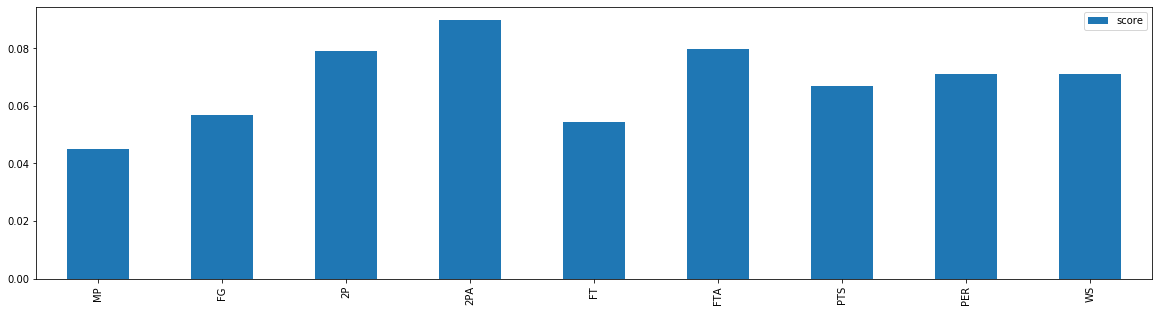

In [94]:
importance= rf_model_1.feature_importances_
importance_df=pd.DataFrame(data=importance, index=X_train.columns, columns=['score'])
importance_df=importance_df[importance_df['score']>0.04]
importance_df
importance_df.plot(kind='bar', figsize=(20,5))
plt.show()

We see that the some importance features are PER (player efficiency rating), FG (Field Goal shots per game), 2P (average two points made per game), FT (Free throws), PTS (points scored per game.) 

# Part 3.5: Gradient boosting models

Random forst is an example of ensemble learning. Other than random forest, an other popular ensemble method is gradient boosting. Unlike random forest where each tree in trained independently, in gradient boosting, trees are trained in sequence. Each time, the model tries to catch the errors made in the previous model. Intuitively, we can think of gradient boosting algorithm as a student who is taking a hard and long exam. First, she would go over all the questions first. Then she would solve the easier questions right a way and save the harder ones for latter. Note that gaining confidence and experience from solving easier questions definitely helps her to solve harder questions. 

As before, we start with a standard gradient boosting model. 

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
#Fit a gradient boosting model to the training set
gb_model_0 = GradientBoostingRegressor()
gb_model_0.fit(X_train, y_train)

GradientBoostingRegressor()

In [97]:
#use this model to make prediction for the training and the test sets.
gb_train_prediction_0=gb_model_0.predict(X_train)
gb_test_prediction_0=gb_model_0.predict(X_test)

As before, let us plot the difference between the prediction and the true values on the training set.

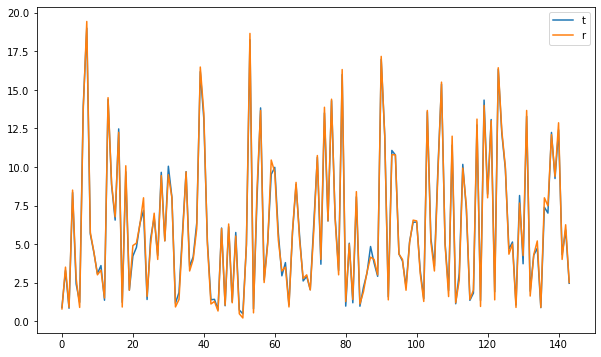

In [98]:
#plot the difference between the model and the true value of y.
plt.figure(figsize=(10,6))
plt.plot(range(len(gb_train_prediction_0)), gb_train_prediction_0)
plt.legend('prediction')
plt.plot(range(len(gb_train_prediction_0)), y_train)
plt.legend('true value')
plt.show()

As before, this model works really well on the training set which is likely due to overfitting. Anyway, let us first compute the training error. 

In [99]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, gb_train_prediction_0))}")

The RMSE on the traing set is 0.2923128562759528


Let us compute the error on the test set. 

In [100]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, gb_test_prediction_0))}")

The RMSE on the test set is 2.3699303030925005


This is pretty good. Let us try to see whether we can do better by changing the learning rate and the number of estimators.

In [101]:
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
learning_rate=[0.05, 0.1, 0.15, 0.2, 0.25]
max_features= ['sqrt', 'log2']
grid1 = dict(n_estimators=n_estimators,max_features=max_features, learning_rate=learning_rate)
model=GradientBoostingRegressor()
gb_grid_search = GridSearchCV(estimator=model, param_grid=grid1, n_jobs=-1, cv=5, 
                              scoring='neg_mean_absolute_error')
gb_result=gb_grid_search.fit(X_train, y_train)

In [102]:
print(f"Best parameter is {gb_result.best_params_}")


Best parameter is {'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 70}


Let us use this best set of hyperparameters to train a new model.  

In [103]:
#Fit a gradient boosting model to the training set
gb_model_1 = GradientBoostingRegressor(max_features='sqrt', learning_rate=0.1, n_estimators=60)
gb_model_1.fit(X_train, y_train)

GradientBoostingRegressor(max_features='sqrt', n_estimators=60)

In [104]:
#use this model to make prediction for the training and the test sets.
gb_train_prediction_1=gb_model_1.predict(X_train)
gb_test_prediction_1=gb_model_1.predict(X_test)

In [105]:
print(f"The RMSE on the traing set is {np.sqrt(sklearn.metrics.mean_squared_error(y_train, gb_train_prediction_1))}")

The RMSE on the traing set is 0.6414990761533925


In [106]:
print(f"The RMSE on the test set is {np.sqrt(sklearn.metrics.mean_squared_error(y_test, gb_test_prediction_1))}")

The RMSE on the test set is 2.3009217138645894


Argurably, this model is reliable (it is not overfitting and the predictions are reasonably good.)

# Part 3.6: Summary of our models.

Here is the summary of our models'performances. It is reasonable to conclude that Gradient Boosting(max_features='sqrt', n_estimators=60) performs the best on this dataset. 

In [107]:
results=pd.read_excel('NBA salary_results.xlsx')
results

,Models,Train error,Test error
0,Linear Regression,1.69,3.00
1,Ridge,1.75,2.76
2,KNN (n=5),1.99,2.54
3,Decision Tree,0.00,2.90
4,Decision Tree (max_depth=4),1.39,2.54
5,"Random Forest(n_estimators=10, max_depth=5)",1.27,2.66
6,"Random forst('max_depth': 5, 'max_features': '...",1.17,2.45
7,Gradient boosting,0.29,2.37
8,"GradientBoostingRegressor(max_features='sqrt',...",0.61,2.28


# Part 4: Conclusions. 

It is a fun project to work on. Other than building reasonably strong models, we also discovered the following. 

* On average, NBA players make about 5.85 million dollars per season (remember: this is around 2010s). The top 5 salaries go to Kobe Bryant, Carmelo Anthony, Paul Gasol, Blake Griffin. 


* It seems that Forward Players are paid slightly more than players at other positions. However, the difference is not big. 

:
* The top 3 teams that paid most to its players  (on average) are Boston Celtics, Brooklyn Nets, Chicago Bulls.  


* Most players sign a 2-4 year contract. It also appears that a longer contract means a higher salary. 


* Quentin Richardson is paid the most for every minute he played (but he only played one game!) The majority of players earn about 2k-5k for every minute played. 


* Kobe Bryant, Lebron James, and Dwyane Wade are probably most efficient players. On average, it only takes them 3.76, 3.86, 3.90 respectively to make a shoot. 


* LaMarcus Aldridge, Kevin Garnett, and Steve Novak are the top 3 most effective at shooting beyond the 3-point line. Their rates of success are 0.5, 0.5, and 0.48 respectively. 


* It is statistically evident that the success rate for free throws is in the range 70-80%. 


* The top 5 scorers are Lebron James, Kevin Durant, Dwyane Wade, Kevin Love, Danny Granger. On average, they make about 26 points per game. 


* It also appears that on average, Forward and Guard earns more points than Center (11 vs 8 points per game.)


* Most players'ages are in the range 22-27. 


* A player's salary is largely influenced by the following stats: PER (player efficiency rating), FG (Field Goal shots per game), 2P (average two points made per game), FT (Free throws), PTS (points scored per game.) 



* Our best model for this problem is the Gradient Boosting Model with max_feature='sqrt' with 60 estimators. With this model, the errors on the training and test sets are 0.61 (millions) and 2.28 (millions) respectively.


* Finally, of course, we can improve the accuracy of our models if more information is available. The reason is that a player's salary is not only a function of his ability. There are many other factors that we should consider such as his salary negotiation, his brand name, etc. 